# XGBoost Notebook

## Quick notebook to practice using xgboost algorithm

### The first section of this notebook will do some data analysis on a dataset for penguins (my favourite aninal, after all). After that I will attempt to predict certain features of the dataset using xgboost algorithm.

Load libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Load & inspect dataframe

In [32]:
df = pd.read_csv('Datasets/penguins.csv')

In [33]:
df.head(10)

,Unnamed: 0,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,1,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,2,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,3,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,4,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,5,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,6,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
6,7,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007-11-15,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,8,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,2007-11-15,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
8,9,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,2007-11-09,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
9,10,PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,2007-11-09,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,No blood sample obtained for sexing.


In [34]:
df.describe()

,Unnamed: 0,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,172.500000,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,99.448479,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,86.750000,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,172.500000,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,258.250000,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,344.000000,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           344 non-null    int64  
 1   studyName            344 non-null    object 
 2   Sample Number        344 non-null    int64  
 3   Species              344 non-null    object 
 4   Region               344 non-null    object 
 5   Island               344 non-null    object 
 6   Stage                344 non-null    object 
 7   Individual ID        344 non-null    object 
 8   Clutch Completion    344 non-null    object 
 9   Date Egg             344 non-null    object 
 10  Culmen Length (mm)   342 non-null    float64
 11  Culmen Depth (mm)    342 non-null    float64
 12  Flipper Length (mm)  342 non-null    float64
 13  Body Mass (g)        342 non-null    float64
 14  Sex                  333 non-null    object 
 15  Delta 15 N (o/oo)    330 non-null    flo

In [36]:
df.isna().sum()

Unnamed: 0               0
studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
dtype: int64

Drop Comments column and fill na values

In [37]:
df.drop('Comments', axis=1, inplace=True)

In [38]:
df.fillna(method='bfill', inplace=True)

In [39]:
df.isna().sum()

Unnamed: 0             0
studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [40]:
df.nunique()

Unnamed: 0             344
studyName                3
Sample Number          152
Species                  3
Region                   1
Island                   3
Stage                    1
Individual ID          190
Clutch Completion        2
Date Egg                50
Culmen Length (mm)     164
Culmen Depth (mm)       80
Flipper Length (mm)     55
Body Mass (g)           94
Sex                      2
Delta 15 N (o/oo)      330
Delta 13 C (o/oo)      331
dtype: int64

In [41]:
df.drop(['Region', 'Stage'], axis=1, inplace=True) #delete as only 1

Visualisations based on species

<AxesSubplot:xlabel='Species', ylabel='count'>

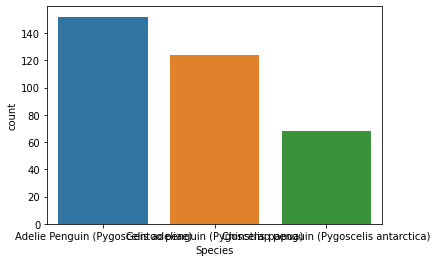

In [20]:
sns.countplot(data=df, x='Species')

<AxesSubplot:xlabel='Species', ylabel='Culmen Length (mm)'>

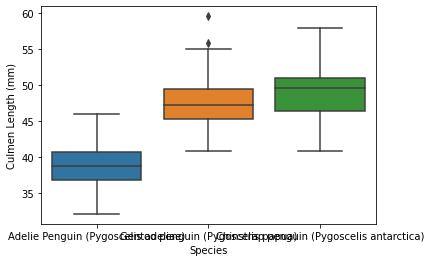

In [21]:
sns.boxplot(data=df, x='Species', y='Culmen Length (mm)')

<AxesSubplot:xlabel='Species', ylabel='Culmen Depth (mm)'>

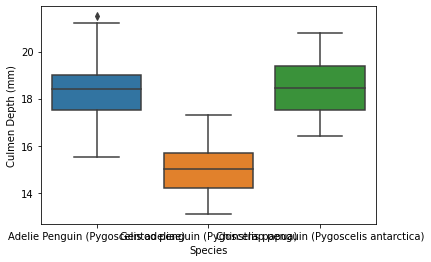

In [22]:
sns.boxplot(data=df, x='Species', y='Culmen Depth (mm)')

<AxesSubplot:xlabel='Species', ylabel='Body Mass (g)'>

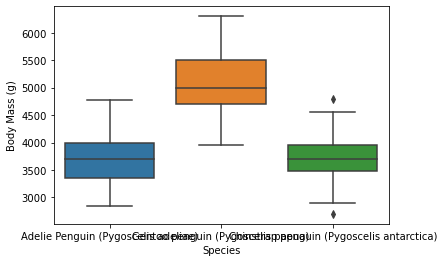

In [23]:
sns.boxplot(data=df, x='Species', y='Body Mass (g)')

Visualisations based on sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

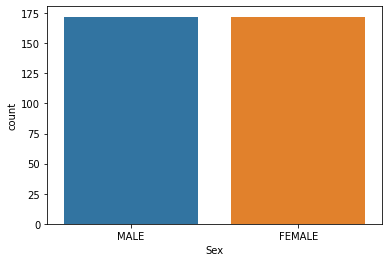

In [44]:
sns.countplot(data=df, x='Sex')

<AxesSubplot:xlabel='Sex', ylabel='Culmen Length (mm)'>

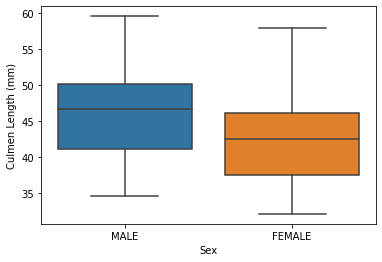

In [42]:
sns.boxplot(data=df, x='Sex', y='Culmen Length (mm)')

In [24]:
df.groupby(['Species', 'Region']).mean()

,,Unnamed: 0,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,Region,,,,,,,,
Adelie Penguin (Pygoscelis adeliae),Anvers,76.5,76.5,38.801316,18.344079,189.986842,3697.697368,8.871951,-25.735877
Chinstrap penguin (Pygoscelis antarctica),Anvers,310.5,34.5,48.833824,18.420588,195.823529,3733.088235,9.357827,-24.546542
Gentoo penguin (Pygoscelis papua),Anvers,214.5,62.5,47.502419,14.971774,217.161290,5074.798387,8.243776,-26.177434
